In [1]:
# importing the necessary libraries

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
mk= pd.read_csv(r"F:\carreer\mall_kmeans.csv") # loading the data

# Data Cleaning and Preprocessing

In [3]:
mk.shape # size of rows and cols

(200, 5)

In [4]:
mk.isnull().sum() # checking the nulls

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
mk.head() # takign the overview

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
mk.Genre.value_counts()

Female    112
Male       88
Name: Genre, dtype: int64

In [7]:
mk.Genre = mk.Genre.fillna('F')

In [8]:
mk.Genre.replace({"Female":1,"Male":0}, inplace=True)

In [9]:
mk = mk.drop(['CustomerID'], axis=1)

# Building the Model Using the Kmeans Algorithm

In [10]:
from sklearn.cluster import KMeans

In [11]:
KMeans_mk = KMeans(n_clusters=3)

In [12]:
KMeans_mk.fit(mk) # model has been created

KMeans(n_clusters=3)

In [13]:
# if 3 cluster have been created then each record should go to one of the cluster

In [14]:
KMeans_mk.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [15]:
uni_cluster = set(KMeans_mk.labels_)
uni_cluster

{0, 1, 2}

In [16]:
# i want to find is 10th record is part of my 1st cluster or 2nd or 3rd

In [17]:
len(KMeans_mk.labels_)

200

In [18]:
KMeans_mk.cluster_centers_ # to find the centroid
# each 

array([[ 0.47368421, 40.39473684, 87.        , 18.63157895],
       [ 0.59349593, 40.32520325, 44.15447154, 49.82926829],
       [ 0.53846154, 32.69230769, 86.53846154, 82.12820513]])

In [19]:
pd.DataFrame(KMeans_mk.cluster_centers_)

,0,1,2,3
0,0.473684,40.394737,87.000000,18.631579
1,0.593496,40.325203,44.154472,49.829268
2,0.538462,32.692308,86.538462,82.128205


In [20]:
# k was 3 but we dont know  if k as 3 is the best value so lets find the value of k (optimum value of k)

In [21]:
KMeans_mk.score(mk)
# while building the plot ignore the minus sign ( take mode value)

-143391.59236035674

In [22]:
# now build the plot
# run a for loop from k=1 till k = 10n

In [23]:
import numpy as np

In [24]:
ssd = []
for k in range(1,20):
    KMeans_mk = KMeans(n_clusters=k)
    KMeans_mk.fit(mk)
    score1=KMeans_mk.score(mk)
    ssd.append(score1)

In [25]:
ssd = np.abs(ssd)
ssd = np.round(ssd)
ssd

array([308862., 212889., 143392., 104423.,  82657.,  58349.,  51204.,
        44390.,  40656.,  37594.,  34582.,  31700.,  29721.,  28659.,
        26541.,  24748.,  23771.,  22287.,  20728.])

In [26]:
k_values = list(range(1,20))
k_values

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [27]:
import matplotlib.pyplot as plt

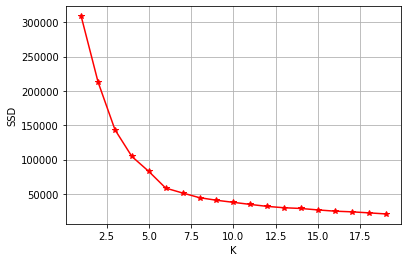

In [28]:
plt.plot(k_values,ssd,marker ="*",color = "r")
plt.xlabel("K")
plt.ylabel("SSD")
plt.grid()

In [29]:
ssd

array([308862., 212889., 143392., 104423.,  82657.,  58349.,  51204.,
        44390.,  40656.,  37594.,  34582.,  31700.,  29721.,  28659.,
        26541.,  24748.,  23771.,  22287.,  20728.])

In [30]:
# automating the code for k mean finding best k for without graphing the plot
ssd=list(ssd)
for i in range(0,len(ssd)-1):
    print((ssd[i]-ssd[i+1])*100/ssd[i])


31.07310060803854
32.64471156330294
27.1765509930819
20.844066920122962
29.408277580846146
12.245282695504637
13.307554097336146
8.411804460464069
7.531483667847304
8.011916795233281
8.333815279625238
6.242902208201893
3.5732310487534065
7.390348581597404
6.7555856975999395
3.947793761112009
6.2429010138403935
6.995109256517252


In [31]:
KMeans_mk = KMeans(n_clusters=4)

In [32]:
KMeans_mk.fit(mk) # model has been created

KMeans(n_clusters=4)

In [33]:
# what next?

# target the customer (which customer is under which cluster )

In [34]:
centroids= pd.DataFrame(KMeans_mk.cluster_centers_)
centroids

,0,1,2,3
0,0.538462,32.692308,86.538462,82.128205
1,0.473684,40.394737,87.000000,18.631579
2,0.500000,24.821429,28.714286,74.250000
3,0.621053,44.894737,48.705263,42.631579


In [35]:
centroids.columns = mk.columns

In [36]:
centroids

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,0.538462,32.692308,86.538462,82.128205
1,0.473684,40.394737,87.000000,18.631579
2,0.500000,24.821429,28.714286,74.250000
3,0.621053,44.894737,48.705263,42.631579


In [37]:
mk["Label"] = KMeans_mk.labels_

In [38]:
KMeans_mk.labels_

array([2, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 2,
       3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0])

In [39]:
mk.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100),Label
0,0,19,15,39,2
1,0,21,15,81,2
2,1,20,16,6,3
3,1,23,16,77,2
4,1,31,17,40,3


# Visualizations

In [40]:
# lets find the relation of age and genre by color plot
# lets add the color code based on cluster

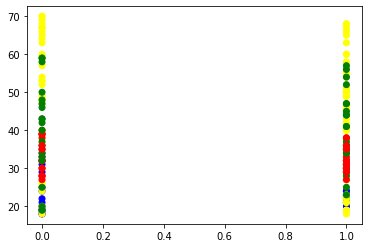

In [41]:
colormap  = np.array(['red' , 'green' , 'blue' , 'yellow'])
plt.scatter(mk.Genre, mk.Age  , c = colormap[KMeans_mk.labels_])


Text(0, 0.5, 'Spending score')

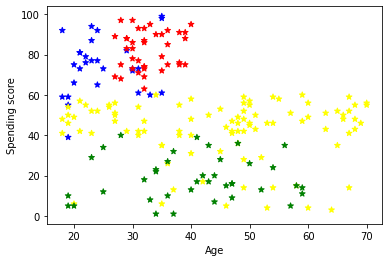

In [43]:
colormap=np.array(['red','green','blue','yellow'])
plt.scatter( mk.Age,mk['Spending Score (1-100)'],marker="*",c = colormap[KMeans_mk.labels_])
plt.xlabel('Age')
plt.ylabel('Spending score')
            # finding the relation between spend score and age

Text(0, 0.5, 'Spending score')

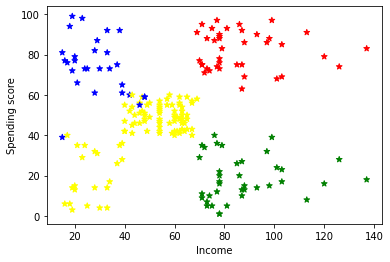

In [46]:
colormap=np.array(['red','green','blue','yellow'])
plt.scatter( mk['Annual Income (k$)'],mk['Spending Score (1-100)'],marker="*",c = colormap[KMeans_mk.labels_])
plt.xlabel('Income')
plt.ylabel('Spending score')
        # finding the relation between income and spending score